# Random Forest

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import datasets

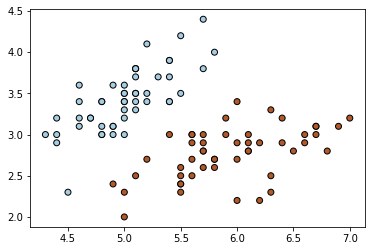

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features.
Y = iris.target

X = X[:100]
Y = Y[:100]
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

In [3]:
clf = RandomForestClassifier(n_estimators=10, max_depth = 2)
clf.fit(X, Y)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

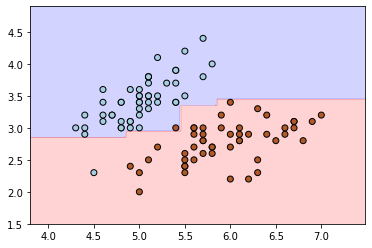

In [5]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
cs = plt.contourf(xx, yy, Z, cmap = "bwr", alpha = 0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.savefig("tree4.pdf", bbox_inches='tight')

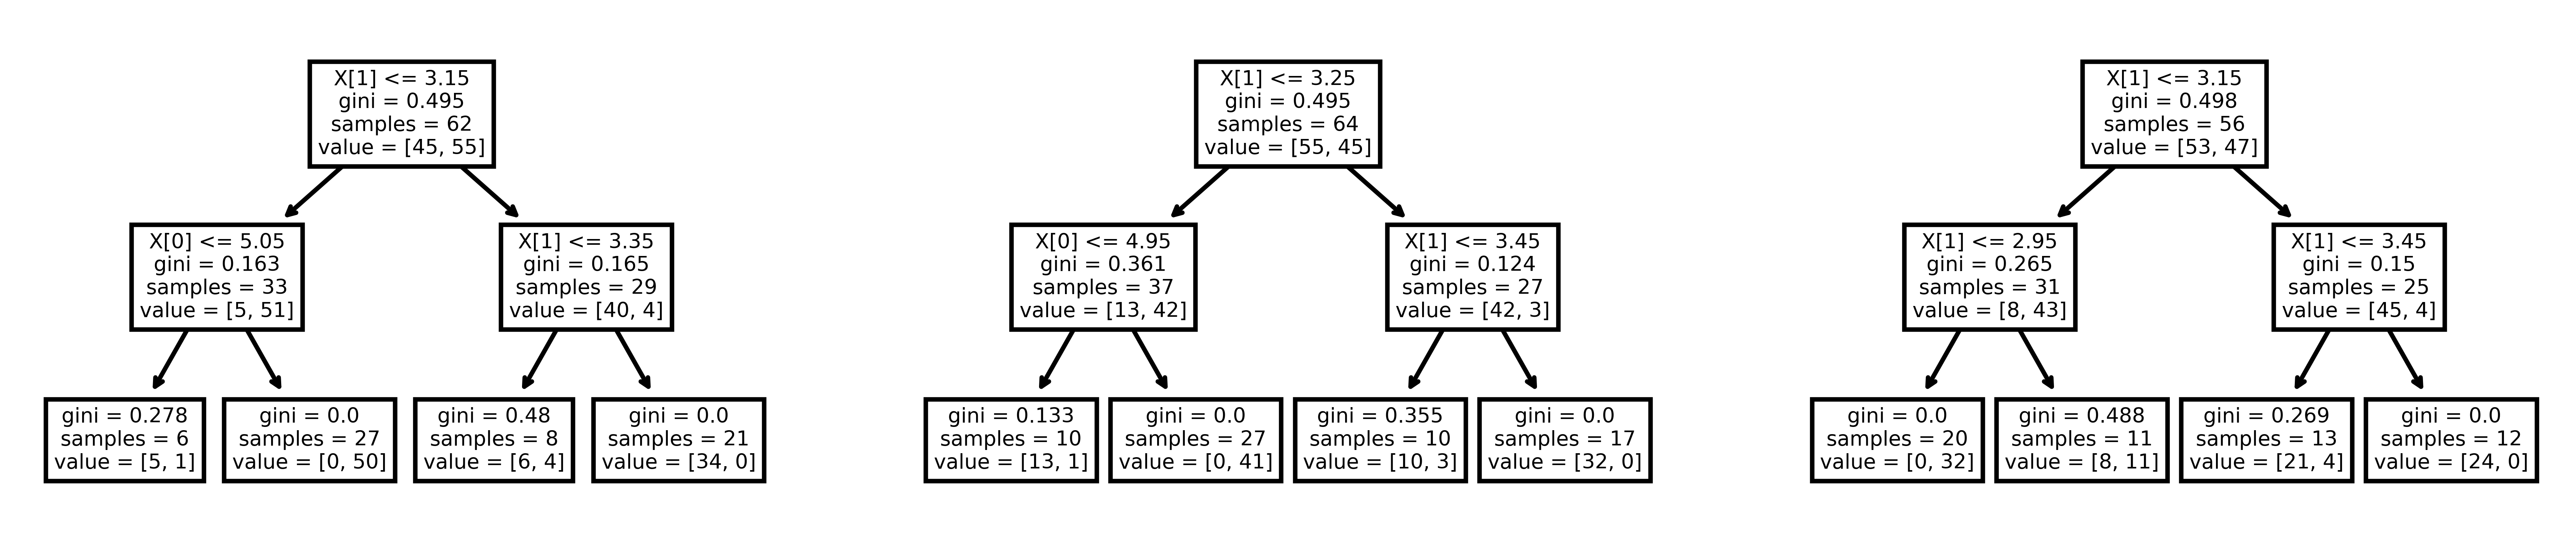

In [6]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(clf.estimators_[index],
                   ax = axes[index]);
fig.savefig('tree.pdf')
plt.savefig("tree4.pdf", bbox_inches='tight')